<a href="https://colab.research.google.com/github/Amrapali03/Learn-PyTorch/blob/main/Datasets_and_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recitation 0: Datasets

# Imports

In [1]:
import  os
import  glob
import  numpy as np
import  pandas as pd
from    tqdm.notebook import tqdm
import  torch
from    torch.utils.data import Dataset

In [ ]:
# !mkdir ~/.kaggle

# with open("/root/.kaggle/kaggle.json", "w+") as f:
#     f.write('{"username": "", "key": ""}')

# !chmod 600 ~/.kaggle/kaggle.json

# Introduction to Datasets

In this recitation, you will learn about different datasets that will be used in our class for part 2s of the homeworks.

## Numpy Dataset

> Create a Numpy array and save it as .npy file.
>
> (In Google Colab, default working directory is /content/, and the following code will save the array to /content/tmp_array.npy

In [2]:
tmp_array = np.ones((3,3))
np.save("tmp_array.npy", tmp_array)

> Loading Numpy array from .npy file

In [3]:
x = np.load("tmp_array.npy")
x # To print the loaded array

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

## Pandas Dataset

<b>Note: </b> Pandas library is not usually used for datasets in our homeworks. However, you will need pandas for writing your inference results into CSV files, which will be used for Kaggle submission.

> Generating a dummy submission table (pandas DataFrame object)

In [4]:
output = pd.DataFrame()
# Set the column names as 'id' and 'label'
output['id'] = np.array(range(5))
output['label'] = np.array(range(10,20,2))
output

,id,label
0,0,10
1,1,12
2,2,14
3,3,16
4,4,18


> Save the table to CSV file

In [5]:
output.to_csv("submission.csv", index = False)

> Load CSV file

In [6]:
output_read = pd.read_csv("submission.csv")
output.head() # Printing the loaded table, .head() method extracts the first N(usually five) rows of the table.

,id,label
0,0,10
1,1,12
2,2,14
3,3,16
4,4,18


from matplotlib import pyplot as plt
_df_0['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='id', y='label', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'id'}, axis=1)
              .sort_values('id', ascending=True))
  xs = counted['id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['label']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'label'}, axis=1)
              .sort_values('label', ascending=True))
  xs = counted['label']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('label', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('label')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

## Pytorch Dataset (Class)

```torch.utils.data.Dataset``` is a PyTorch interface for reading, organizing, preprocessing your input data of different formats.

While PyTorch offers some datasets that work out of the box, you will need to implement your own PyTorch Dataset classes to adapt the dataset we provided, usually numpy files.

In this tutorial, we will teach you how to create your custom Dataset class.

For more information, check out PyTorch's documentation on [Datasets and Dataloaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html).



> Data loading pipeline for **PyTorch**

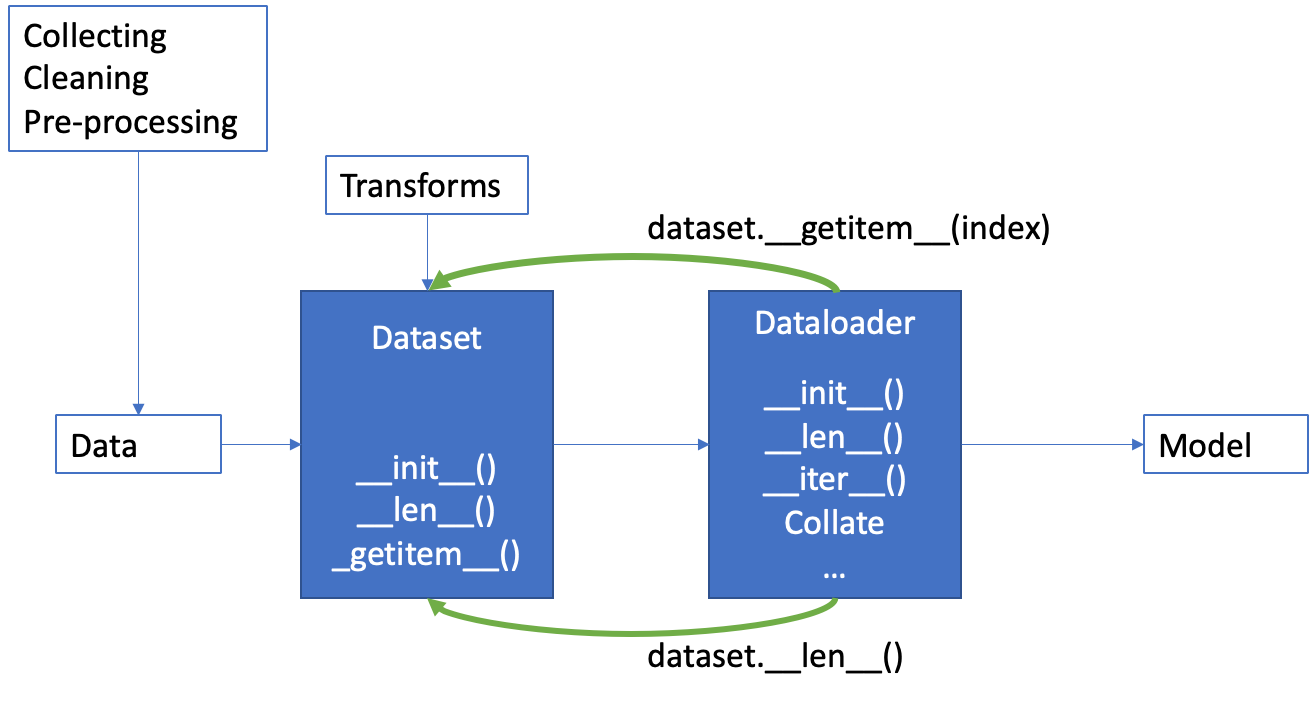

# BUILDING CUSTOM DATASETS IN PYTORCH

## General Approach

While it's tempting to jump right into defining a dataset, it is important to **understand your data first.** Whether you are working with audio data, image data, or data of another kind, load an example. Visualize it. See what shape the data is. Think about the process that generated this data in the first place. To the extent you can, think about whether the data is adequately representative of the problem you are trying to solve. These types of considerations are easy to skip on a homework, but they matter in the real world. Don't let PyTorch's lovely interface (which makes your life easier) allow you to forget all the complexity of the world and what we are trying to model!

## Basic PyTorch Dataset Definition

Now onto the nuts and bolts...

When defining a Dataset class, **you need to define 3 functions**:
* `__init__`: Constructor function.
* `__len__`: Returns the length of the dataset. Usually, you can store the length in the constructor and simply return it here.
* `__getitem__`: Retrieves an individual observation.

Additionally, you can also optionally define a custom `collate_fn` that will be passed to a Dataloader and controls how individual examples are batched.

## Additional Design Considerations

There are a few **design considerations**, your choices on which will depend on the situation. (No need to master these all at once, but food for thought). For instance:
* **Does your data fit into memory all at once? If so, you will probably want to load and preprocess all of your data in the `__init__` function rather than the `__getitem__` function**, because `__getitem__` is called every time your model requests data, meaning you want to reduce the computation time in this funcitno as much as possible. However, **if your data does not fit into memory all at once, you may have to create a "memory-efficient" dataset class that loads data in the `__getitem__` function.**

* **Do you want to instantiate your dataset object using xs and ys? What about passing it a path to a root directory?** Many of the datasets we will be working with from kaggle have a directory structure and directory names that will allow you to simply point to a directory and have your constructor function do the work!
  * Among other helpful functions, check out the `os.listdir` function [here](https://docs.python.org/3/library/os.html).
  * Also check out the `glob` package [here](https://docs.python.org/3/library/glob.html), which provides helpful pattern-matching functionality for filenames.

* **Should you have separate dataset classes for train (and validation) datasets versus test? (Hint: yes).** Why? Well, consider this: for your test data, do you have access to the ground truth information? No! So think about how your `__getitem__` function might be different.

* When building an initial working prototype (and if you are loading all examples into memory), do you need to load all your training examples? Maybe not. **Consider allowing yourself to limit the number of examples loaded in for quicker iteration until you know your training pipeline works and can begin to train.**

## Example: A Basic Dataset Class

A vanilla Dataset class is defined below. Think about how you might add some sprinkles!

In [7]:
class MyDataset(Dataset):

    def __init__(self, xs, ys):
        """Simple constructor function for train/val datasets."""

        self.xs = xs
        self.ys = ys
        self.length = len(self.xs)

    def __len__(self):
        """Returns length of the dataset."""

        return self.length

    def __getitem__(self, idx):
        """
        Returns the item at a given index.
        This function is called every time the model requests data,
          so it is bests to reduce the computation time of this function.
        Therefore, preprocessing is usually done in the constructor, if
          memory allows.
        """
        return self.xs[idx], self.ys[idx]


class MyDatasetTest(Dataset):

    def __init__(self, xs):
        """Simple constructor function for test dataset."""

        self.xs = xs
        self.length = len(self.xs)

    def __len__(self):

        return self.length

    def __getitem__(self, idx):

        return self.xs[idx]

> Constructing and indexing into a MyDataset instance

In [8]:
######################################
#                                    #
#  Constructing a MyDataset object   #
#                                    #
######################################

# Here we are generating our dummy samples and labels
xs = list(range(10))
ys = list(range(10,20))

# Create an instance of MyDataset Class
dataset = MyDataset(xs, ys)

# Check the length of the dataset
print(f"len(dataset): {len(dataset)}")

######################################
#                                    #
#  Reading data from dataset object  #
#                                    #
######################################

# The indexing operation will call __getitem__ function.
# In this case, the 0th items in xs and ys are returned as a tuple.
x, y = dataset[0]
print(x, y)

# You can also pass the dataset to a loop
for x, y in dataset:
    print(x, y)
    break

# You can also use the __next__ method
x, y = next(iter(dataset))
print(x, y)

len(dataset): 10
0 10
0 10
0 10


## Exercise: Define your own PyTorch Dataset class

Fill in the blanks to define a Dataset that takes in a list of numpy sample and label files.

In [ ]:
class MyDataset(Dataset):
    # Constructor
    # x_files_paths will take in a list of numpy files, each file contains one sample
    # y_files_paths will take in a list of numpy files, each file contains one label
    def __init__(self, x_files_paths=[], y_files_paths=[]):
        self.x_files = x_files_paths
        self.y_files = y_files_paths

        # Assume that there will be same number of x and y files, and the filename would be either "x_{file_id}.npy" or "y_{file_id}.npy"
        # The file_id is a unique identifier for each training sample.
        # How can you make sure that the x and y loaded are in the same order?
        # HINT: SORT!

        self.x_files = _______
        self.y_files = _______

        # Fill in the below two lines(might require more) to load the numpy data and store it into class variables
        self.x = _________
        self.y = _________

        # Do some preprocessing to the data you loaded, be creative.
        _______

    # __len__ method returns how many samples(data) your Dataset contains
    def __len__(self):
        return len(self.x_files)  # Fill

    # __getitem__ returns the item at index i
    def __getitem__(self, i):
        return self.x[i], self.y[i] # Fill

In [12]:
class MyDataset(Dataset):
    # Constructor
    # x_files_paths will take in a list of numpy files, each file contains one sample
    # y_files_paths will take in a list of numpy files, each file contains one label
    def __init__(self, x_files_paths=[], y_files_paths=[]):
        self.x_files = x_files_paths
        self.y_files = y_files_paths

        # Assume that there will be same number of x and y files, and the filename would be either "x_{file_id}.npy" or "y_{file_id}.npy"
        # The file_id is a unique identifier for each training sample.
        # How can you make sure that the x and y loaded are in the same order?
        # HINT: SORT!

        self.x_files = sorted(x_files_paths)
        self.y_files = sorted(y_files_paths)

        # Fill in the below two lines(might require more) to load the numpy data and store it into class variables
        self.x = [np.load(file) for file in self.x_files]
        self.y = [np.load(file) for file in self.y_files]


        # Do some preprocessing to the data you loaded, be creative.

    # __len__ method returns how many samples(data) your Dataset contains
    def __len__(self):
        return len(self.x_files)  # Fill

    # __getitem__ returns the item at index i
    def __getitem__(self, i):
        return self.x[i], self.y[i] # Fill

## Example: A Dataset based on Kaggle data

For most (if not all) of the homeworks, once you download data from Kaggle, you will have it in a directory similar to the following:

```
competition-name
  ├── dev-clean
      ├── features
      └── labels
  ├── test-clean
      └── features
  └── train-clean
      ├── features
      └── labels
```

Given this structure, you can write a Dataset class along the lines of the one below that constructs the dataset object using directory paths.

(Since we don't actually have data, this code won't do much, but it is given as a general sketch of how you might write the class.)

In [9]:
class DirDataset(Dataset):

    def __init__(self, root, limit=None, transforms=None, debug=False):

        # (Optional) Store any arguments used outside constructor --------------
        # ...

        # Get filepaths --------------------------------------------------------
        feat_dir = os.path.join(root, 'features')
        label_dir = os.path.join(root, 'labels')

        if limit is None:
            feat_fnames = sorted(os.listdir(feat_dir))
            label_fnames = sorted(os.listdir(label_dir))
        else:
            feat_fnames = sorted(os.listdir(feat_dir))[:limit]
            label_fnames = sorted(os.listdir(label_dir))[:limit]

        feat_paths = [os.path.join(feat_dir, fname) for fname in feat_fnames]
        label_paths = [os.path.join(label_dir, fname) for fname in label_fnames]

        # Set length -----------------------------------------------------------
        assert len(feat_paths) == len(label_paths)
        self.length = len(feat_paths)

        # Loop through filepaths, load, preprocess, and store ------------------
        self.feats, self.labels = [], []
        for feat_path, label_path in tqdm(zip(feat_paths, label_paths)):

            # Load files
            feat = np.load(feat_path)
            label = np.load(label_path)

            # (Optional) Preprocessing
            # ...

            # Append to list
            self.feats.append(feat)
            self.labels.append(label)

        # (Optional) Concatenate and add context

        if debug: print('Dataset created')


    def __len__(self):

        return self.length

    def __getitem__(self, idx):

        return self.feats[idx], self.labels[idx]


class DirDatasetTest(Dataset):

    def __init__(self, root, limit=None, transforms=None, debug=False):
        """
        Note: This is identical to the above, just without labels.
        """

        # (Optional) Store any arguments used outside constructor --------------
        # ...

        # Get filepaths --------------------------------------------------------
        feat_dir = os.path.join(root, 'features')

        if limit is None:
            feat_fnames = sorted(os.listdir(feat_dir))
        else:
            feat_fnames = sorted(os.listdir(feat_dir))[:limit]

        feat_paths = [os.path.join(feat_dir, fname) for fname in feat_fnames]

        # Set length -----------------------------------------------------------
        self.length = len(feat_paths)

        # Loop through filepaths, load, preprocess, and store ------------------
        self.feats = []
        for feat_path in tqdm(feat_paths):

            # Load files
            feat = np.load(feat_path)

            # (Optional) Preprocessing
            # ...

            # Append to list
            self.feats.append(feat)

        # (Optional) Concatenate and add context

        if debug: print('Dataset created')


    def __len__(self):

        return self.length

    def __getitem__(self, idx):

        return self.feats[idx]


In [10]:
train_dataset = DirDataset(os.path.join('competition-name', 'train-clean'))
valid_dataset = DirDataset(os.path.join('competition-name', 'dev-clean'))
test_dataset  = DirDatasetTest(os.path.join('competition-name', 'test-clean'))

FileNotFoundError: [Errno 2] No such file or directory: 'competition-name/train-clean/features'

Food for thought: Outside of the world of Kaggle, which very nicely splits train, dev, and test sets for you, how might you make these splits yourself?